<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.python4engineer/blob/main/Bai_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bài tập Assignment : Cho tập dữ liệu về doanh số bán hàng gồm các thông tin như sau 
Dữ liệu: (https://drive.google.com/file/d/1QWD8rceAWo6KJYHh6Tx0eBtAM9U1EQno/view?usp=sharing(sad)
hoặc Superstore Sales Dataset Analysis | Kaggle


## Thêm các thư viện và khởi tạo dữ liệu

In [ ]:
import os
import numpy as np
import pandas as pd

### Clear Warning
import warnings; 
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import cufflinks as cf


# lấy dữ liệu từ link github
dataf = pd.read_csv('https://raw.githubusercontent.com/nguyenvudev20/mse22.python4engineer/main/train.csv')


## Kiểm tra dữ liệu

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
dataf.shape

(9800, 18)

## Xử lý làm sạch dữ liệu

In [ ]:
dataf[dataf.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [ ]:
dataf.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
dataf[dataf.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [ ]:
dataf.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
dataf[dataf['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
dataf['Postal Code'] = dataf['Postal Code'].fillna('700000')

In [ ]:
dataf['Order Date'] = pd.to_datetime(dataf['Order Date'],format='%d/%m/%Y')
dataf['Ship Date'] = pd.to_datetime(dataf['Ship Date'],format='%d/%m/%Y')

In [ ]:
dataf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
dataf.sort_values(by=['Order Date'],inplace=True)

In [ ]:
dataf['Ship Date'].value_counts()

2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-12-12    30
2018-09-06    30
              ..
2016-02-22     1
2016-02-20     1
2016-02-14     1
2016-02-16     1
2016-05-14     1
Name: Ship Date, Length: 1326, dtype: int64

In [ ]:
print("Kiểm tra null :",dataf.isnull().sum())
print("Kiểm tra duplicated :",dataf.duplicated())

Kiểm tra null : Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
Kiểm tra duplicated : 7980    False
741     False
740     False
739     False
1759    False
        ...  
1297    False
906     False
645     False
908     False
5091    False
Length: 9800, dtype: bool


## Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

In [ ]:
#Tạo cột Năm-Tháng tính doanh thu theo mỗi tháng
dataf['Year Month'] = dataf['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
dfm = pd.DataFrame(dataf.groupby('Year Month').sum()['Sales'].reset_index())
dfm.head(5)

,Year Month,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


In [ ]:
# vẽ biểu đồ dạng area của plotly.express
fig = px.area(y=dfm['Sales'],x= dfm['Year Month'], title = 'Doanh Thu Theo Tháng',labels={'x':'Thời Gian','y':'Doanh Thu'}, width=1000, height=500)
fig.update_layout(showlegend = False)
fig.show()

In [ ]:
# tính doanh thu trung bình 3 tháng gần nhất
print('Doanh thu trung bình 3 tháng gần nhất là ',dfm.tail(3)['Sales'].mean())

Doanh thu trung bình 3 tháng gần nhất là  92805.55833333333


## Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

In [ ]:
#tạo cột Năm-Quý
dataf['Year Quarter'] = dataf['Order Date'].dt.to_period(freq = 'Q')
dfq = pd.DataFrame(dataf.groupby('Year Quarter').sum()['Sales'].reset_index())
dfq

,Year Quarter,Sales
0,2015Q1,73931.3960
1,2015Q2,85874.0936
2,2015Q3,142522.6063
3,2015Q4,177528.1122
4,2016Q1,62357.6870
5,2016Q2,87713.3730
6,2016Q3,128560.2072
7,2016Q4,180804.7382
8,2017Q1,92686.3650
9,2017Q2,135061.1610


In [ ]:
fig = px.area(y=dfq['Sales'],x= dfq['Year Quarter'].astype('str'), title = 'Doanh Thu Theo Quý',labels={'x':'Thời Gian','y':'Doanh Thu'}, width=1000, height=500)
fig.update_layout(showlegend = False)
fig.show()

In [ ]:
# Quý có tổng doanh thu cao nhất là
print('Quý có tổng doanh thu cao nhất là \r\n',dfq.nlargest(1, 'Sales'))

Quý có tổng doanh thu cao nhất là 
    Year Quarter       Sales
15       2018Q4  278416.675


## Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

In [ ]:
# tính thời gian giao hàng từng đơn hàng theo giá trị ngày
dataf['Ship Time'] =(dataf['Ship Date'] - dataf['Order Date']).dt.days
# tính thời gian giao hàng trung bình hàng tháng
dfs = pd.DataFrame(dataf.groupby('Year Month').mean()['Ship Time'].reset_index())
dfs.head(5)

,Year Month,Ship Time
0,2015-01,4.194805
1,2015-02,4.173913
2,2015-03,3.961039
3,2015-04,4.015385
4,2015-05,3.801653


In [ ]:
# vẻ biểu đồ 
fig = px.area(y=dfs['Ship Time'],x= dfs['Year Month'].astype('str'), title = 'Thời gian giao hàng trung bình theo tháng',labels={'x':'Tháng Năm','y':'Thời Gian(ngày)'}, width=1000, height=500)
fig.update_layout(showlegend = False)
fig.show()

## Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

In [ ]:
# tính sức mua từng thành phố
dfc = pd.DataFrame(dataf.groupby('City').sum()['Sales'].sort_values(ascending=False))
dfc=dfc.round().reset_index()
dfc

,City,Sales
0,New York City,252463.0
1,Los Angeles,173420.0
2,Seattle,116106.0
3,San Francisco,109041.0
4,Philadelphia,108842.0
...,...,...
524,Ormond Beach,3.0
525,Pensacola,2.0
526,Jupiter,2.0
527,Elyria,2.0


In [ ]:
# tạo biểu dồ dạng hình tròn
fig = px.pie(dfc, values='Sales', names='City',
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 800, height=800, title = 'Biểu đồ sức mua từng thành phố')
fig.update_traces(text = dfc['Sales'].value_counts(), textinfo = 'label+percent',textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show() # hiển thị biểu đồ

In [ ]:
# top 3 thành phố có doanh số cao nhất
print('Top 3 thành phố có danh thu cao nhất ',dfc.head(3))

Top 3 thành phố có danh thu cao nhất              City     Sales
0  New York City  252463.0
1    Los Angeles  173420.0
2        Seattle  116106.0


In [ ]:
# top 3 thành phố có doanh số thấp nhất
print('Top 3 thành phố có danh thu thấp nhất ',dfc.tail(3))

Top 3 thành phố có danh thu thấp nhất          City  Sales
526  Jupiter    2.0
527   Elyria    2.0
528  Abilene    1.0


## Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

In [ ]:
# tính tỷ trọng doanh số theo bang
dfst = pd.DataFrame(dataf.groupby('State').sum()['Sales'].sort_values(ascending=False))
dfst=dfst.round().reset_index()
dfst['Percent']=((dfst['Sales']/dfst['Sales'].sum()) *100).round(2)
dfst

,State,Sales,Percent
0,California,446306.0,19.73
1,New York,306361.0,13.55
2,Texas,168573.0,7.45
3,Washington,135207.0,5.98
4,Pennsylvania,116277.0,5.14
5,Florida,88437.0,3.91
6,Illinois,79237.0,3.50
7,Michigan,76136.0,3.37
8,Ohio,75130.0,3.32
9,Virginia,70637.0,3.12


In [ ]:
# tạo biểu dồ dạng hình tròn
fig = px.pie(dfst, values='Percent', names='State',
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 800, height=800, title = 'Biểu đồ tỷ trong doanh số theo Bang')
fig.update_traces(text = dfst['Percent'].value_counts(), textinfo = 'label+percent',textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show() # hiển thị biểu đồ

In [ ]:
# Doanh số trung bình 5 bang  dẫn đầu về sức mua
print('Doanh số trung bình 5 Bang có sức mua cao nhất: ',dfst['Sales'].head(5).mean())

Doanh số trung bình 5 Bang có sức mua cao nhất:  234544.8


## Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [ ]:
# tạo df chứa dữ liệu cần sử dụng
dfst2 = pd.DataFrame(dataf.groupby(['State','Region']).sum()['Sales'].sort_values(ascending=False))
dfst2=dfst2.round().reset_index()

# tạo hàm tìm kiếm theo region
def find_state_top_sales_by_region(df,region,num_top=1):
      df_final=df.loc[df['Region'] == region]
      return df_final.head(num_top)

In [ ]:
# tìm bang dẫn đầu doanh số về các vùng bằng cách gọi hàm find_state_top_sales_by_region
dftemp=dataf.groupby('Region', as_index = False)['Region'].median()
dftemp
for x in dftemp['Region']:
  print('Bang dẫn đầu về doanh số vùng ',x,' là :\r\n',find_state_top_sales_by_region(dfst2,x,1),'\r\n')

Bang dẫn đầu về doanh số vùng  Central  là :
    State   Region     Sales
2  Texas  Central  168573.0 

Bang dẫn đầu về doanh số vùng  East  là :
       State Region     Sales
1  New York   East  306361.0 

Bang dẫn đầu về doanh số vùng  South  là :
      State Region    Sales
5  Florida  South  88437.0 

Bang dẫn đầu về doanh số vùng  West  là :
         State Region     Sales
0  California   West  446306.0 



## Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

In [ ]:
## chuẫn bị dữ liệu
dfsp=pd.DataFrame(dataf.groupby(['Product ID','Product Name','Category']).agg(MySum=('Sales', 'sum'), MyCount=('Product ID', 'count')))

In [ ]:
# Top 3 sản phẩm có danh thu cao nhất
print('Top 3 sản phẩm có danh thu cao nhất \r\n')
dfsp.sort_values(by='MySum',ascending=False).head(3)


Top 3 sản phẩm có danh thu cao nhất 



,,,MySum,MyCount
Product ID,Product Name,Category,,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,61599.824,5
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,27453.384,10
TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferencing Unit,Technology,22638.480,1


In [ ]:
# Top 3 sản phẩm có đơn vị bán cao nhất
print('Top 3 sản phẩm có đơn vị bán cao nhất \r\n')
dfsp.sort_values(by='MyCount',ascending=False).head(3)

Top 3 sản phẩm có đơn vị bán cao nhất 



,,,MySum,MyCount
Product ID,Product Name,Category,,
FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",Furniture,3641.274,15
TEC-AC-10003628,Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,Technology,1409.530,15
OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal Lined Pattern,Office Supplies,780.456,14


## Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.

In [ ]:
## chuẫn bị dữ liệu
dfcate=pd.DataFrame(dataf.groupby(['Category']).sum()['Sales'].sort_values(ascending=False))
dfcate=dfcate.round().reset_index()
dfcate['Percent']=((dfcate['Sales']/dfcate['Sales'].sum()) *100).round(2)
dfcate

,Category,Sales,Percent
0,Technology,827456.0,36.59
1,Furniture,728659.0,32.22
2,Office Supplies,705422.0,31.19


In [ ]:
# vẻ biểu đồ tròn
fig = px.pie(dfcate, values='Sales', names='Category',
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Tỉ trọng doanh số theo Category')
fig.update_traces(text = dfcate['Sales'].value_counts(), textinfo = 'label+percent')
fig.show() # hiển thị biểu đồ

## Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..  và phát hành API để khai thác.

tham khảo tài liệu:


*   [dự báo theo chuổi thời gian với arima](https://galaxyz.net/huong-dan-du-bao-chuoi-thoi-gian-voi-arima-bang-python-3.2170.anews)



In [ ]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
# lọc dữ liệu cần xử lý từ dữ liệu gốc dataf
kieu_ngay=5 # số ngày muốn dự báo
kieu_key='State' # loại giữ liệu muốn lọc : Region,State,Category
kieu_val='Florida' # giá trị muốn lọc: Region=Central, State=Florida, Category=Furniture

df_tmp=dataf
df_ts=df_tmp.loc[df_tmp[kieu_key] == kieu_val]
#df_ts
# thực hiện sắp xếp dữ liệu theo Order Date
df_ts.sort_values(by=['Order Date'], inplace=True, ascending=True)
df_ts.set_index("Order Date", inplace = True)
df_ts



,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year Month,Year Quarter,Ship Time
Order Date,,,,,,,,,,,,,,,,,,,,
2015-02-02,9139,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,United States,Saint Petersburg,Florida,33710.0,South,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,180.960,2015-02,2015Q1,7
2015-02-02,9138,CA-2015-123400,2015-02-09,Standard Class,EB-13930,Eric Barreto,Consumer,United States,Saint Petersburg,Florida,33710.0,South,OFF-BI-10000666,Office Supplies,Binders,Surelock Post Binders,18.336,2015-02,2015Q1,7
2015-03-04,4422,CA-2015-117016,2015-03-09,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Margate,Florida,33063.0,South,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",15.552,2015-03,2015Q1,5
2015-03-14,9515,CA-2015-100293,2015-03-18,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,Florida,32216.0,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91.056,2015-03,2015Q1,4
2015-03-15,606,CA-2015-149958,2015-03-19,Standard Class,AS-10240,Alan Shonely,Consumer,United States,Tampa,Florida,33614.0,South,OFF-BI-10001543,Office Supplies,Binders,GBC VeloBinder Manual Binding System,43.188,2015-03,2015Q1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-11,7347,CA-2018-168389,2018-12-17,Standard Class,DV-13045,Darrin Van Huff,Corporate,United States,Jacksonville,Florida,32216.0,South,OFF-AR-10001958,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,13.584,2018-12,2018Q4,6
2018-12-11,7348,CA-2018-168389,2018-12-17,Standard Class,DV-13045,Darrin Van Huff,Corporate,United States,Jacksonville,Florida,32216.0,South,FUR-CH-10000225,Furniture,Chairs,"Global Geo Office Task Chair, Gray",64.784,2018-12,2018Q4,6
2018-12-22,1893,CA-2018-145310,2018-12-24,Second Class,JP-15520,Jeremy Pistek,Consumer,United States,Port Orange,Florida,32127.0,South,OFF-EN-10002621,Office Supplies,Envelopes,Staple envelope,7.824,2018-12,2018Q4,2


In [ ]:
# tạo mới dữ liệu theo Sales và chuổi ngày
new_data = pd.DataFrame(df_ts['Sales'])
new_data

,Sales
Order Date,
2015-02-02,180.960
2015-02-02,18.336
2015-03-04,15.552
2015-03-14,91.056
2015-03-15,43.188
...,...
2018-12-11,13.584
2018-12-11,64.784
2018-12-22,7.824


In [ ]:
# dùng resample() tạo chuổi thời gian liên tục 
# lọc các giá trị trùng lặp lấy giá trị trung bình
new_data = pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data


,Sales
Order Date,
2015-02-02,99.648
2015-02-03,NaN
2015-02-04,NaN
2015-02-05,NaN
2015-02-06,NaN
...,...
2018-12-21,NaN
2018-12-22,7.824
2018-12-23,NaN


In [ ]:
# thực hiện nội suy các giá trị còn thiếu
new_data = new_data.interpolate(method='linear') 
new_data

,Sales
Order Date,
2015-02-02,99.648000
2015-02-03,96.844800
2015-02-04,94.041600
2015-02-05,91.238400
2015-02-06,88.435200
...,...
2018-12-21,26.972068
2018-12-22,7.824000
2018-12-23,28.716000


In [ ]:
# lấy ngày đầu tiên trong danh sách
day_first_indf=str(new_data.first_valid_index())
day_first_indf

'2015-02-02 00:00:00'

In [ ]:
# tạo model
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit()


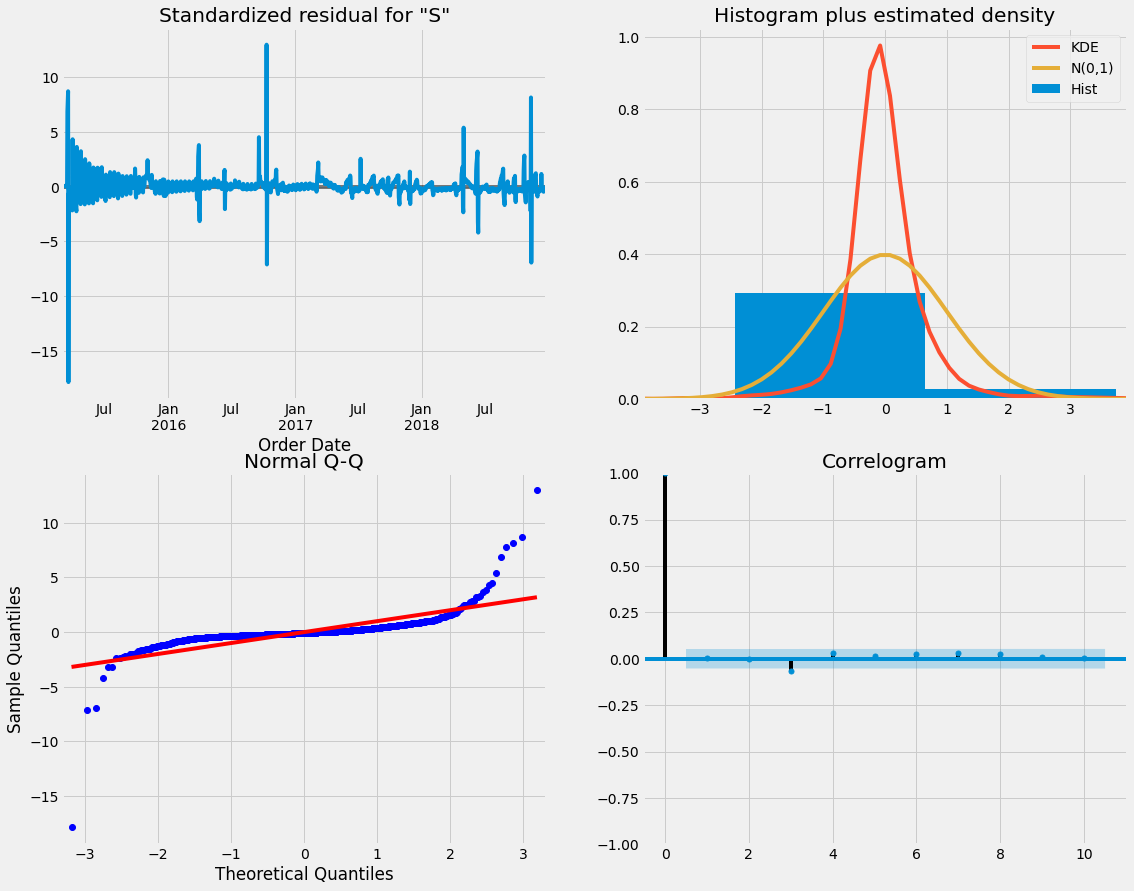

In [ ]:
# hiển thị model
results.plot_diagnostics(figsize=(17, 14)) 
plt.show() 

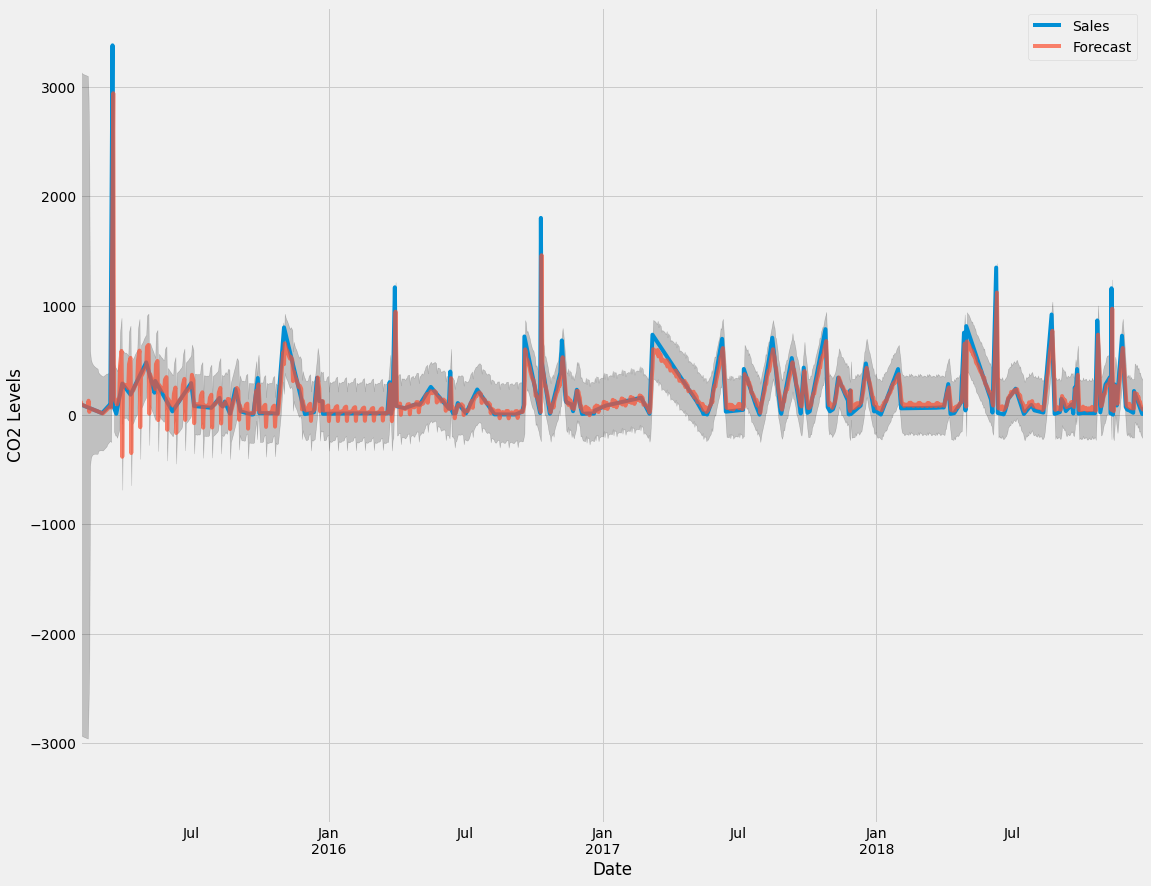

In [ ]:
#Xác thự dự báo với chuổi thời gian đã có ở trước
pred = results.get_prediction(start=pd.to_datetime(day_first_indf), dynamic=False) 
pred_val = pred.conf_int()

ax = new_data['2015':].plot(figsize=(17, 14),label='observed') 
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)  
ax.fill_between(pred_val.index,                 
                pred_val.iloc[:, 0],                 
                pred_val.iloc[:, 1], color='k', alpha=.2)  
ax.set_xlabel('Date') 
ax.set_ylabel('CO2 Levels') 
plt.legend()  
plt.show()


In [ ]:
# đánh giá model
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']
mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('Sai số trung bình trong dự báo {}'.format(round(rmse, 2))) 

Sai số trung bình trong dự báo 145.24


In [ ]:
# thực hiện dự đoán cho n ngày 
forecast = results.forecast(steps=kieu_ngay)
pred_ci = forecast.astype('int')
print(pred_ci)

2018-12-26     85
2018-12-27    128
2018-12-28    135
2018-12-29    172
2018-12-30    166
Freq: D, Name: predicted_mean, dtype: int64


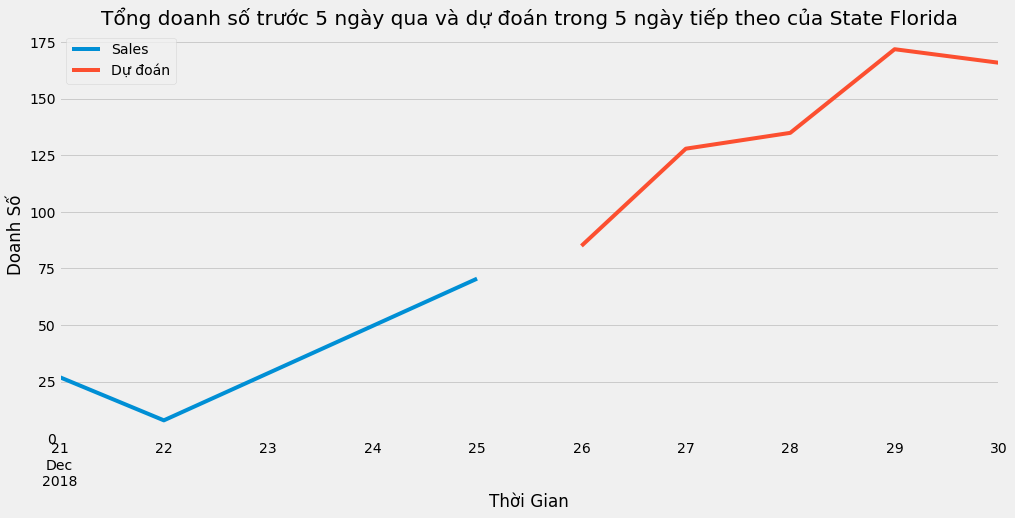

In [ ]:
ax = new_data.iloc[(kieu_ngay*-1):,].plot(figsize=(15, 7), title='Tổng doanh số trước ' +str(kieu_ngay)+' ngày qua và dự đoán trong ' +str(kieu_ngay)+' ngày tiếp theo của '+kieu_key+' '+kieu_val) 
df_end=pd.Series(pred_ci)
df_end.plot(ax=ax, label='Dự đoán')  
ax.set_xlabel('Thời Gian') 
ax.set_ylabel('Doanh Số') 
plt.legend() 
plt.show()

## Tạo API

In [ ]:
# thêm thư viện FastAPI
from fastapi import  FastAPI

# tạo dataframe chứa dữa liệu dự báo
forecast = forecast.astype('int') 
forecast_df = forecast.to_frame() 
forecast_df.reset_index(level=0, inplace=True) 
forecast_df.columns = ['Ngay', 'du bao']
forecast_df['Ngay']=forecast_df['Ngay'].astype(str)
  
# khởi tạo API
app = FastAPI()

# tạo Path dubaotheobang để lấy dữ liệu dự báo 
@app.get("/dubaotheobang")
async def dubaotheobang():   
    return forecast_df.to_json(orient="records") # chuyển đổi kiểu jjson để trả về
# tạo Path root 
@app.get("/")
async def root():
    return {"message": "Xin chào đây là ví dụ API"}


### Kết quả khi chạy api



1.   Code trên Visual Studio Code
    ![](https://raw.githubusercontent.com/nguyenvudev20/mse22.python4engineer/main/api1.JPG)
2.   Chạy với Postman
![](https://raw.githubusercontent.com/nguyenvudev20/mse22.python4engineer/main/api2.JPG)
3.   Sau khi loại bỏ các ký tự \ ta được chuổi Json
![](https://raw.githubusercontent.com/nguyenvudev20/mse22.python4engineer/main/api3.JPG)

